# Naive Bayes Classification
## 1. Read the Iris dataset

In [1]:
import pandas as pd
iris = pd.read_csv('Iris.csv', header = None)
# Create column labels
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

## 2. Classify the training set
### 2.1. Try different sets of features

In [2]:
from sklearn.naive_bayes import GaussianNB

# Define all possible sets of features
featureSets = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3],
               [0,1,2], [0,1,3], [0,2,3], [1,2,3],
               [0,1,2,3]]

# Run through all sets of features
for features in featureSets:
    # Assemble the training set 
    X = iris.iloc[:, features].values
    y = pd.factorize(iris['Species'].values)[0]
    # Training and training accuracy
    print("Features:", features, end = "\t")
    model = GaussianNB()
    model.fit(X, y)
    accuracy = model.score(X, y)
    print("Accuracy:", accuracy)

Features: [0, 1]	Accuracy: 0.78
Features: [0, 2]	Accuracy: 0.9133333333333333
Features: [0, 3]	Accuracy: 0.96
Features: [1, 2]	Accuracy: 0.92
Features: [1, 3]	Accuracy: 0.9466666666666667
Features: [2, 3]	Accuracy: 0.96
Features: [0, 1, 2]	Accuracy: 0.88
Features: [0, 1, 3]	Accuracy: 0.9466666666666667
Features: [0, 2, 3]	Accuracy: 0.9666666666666667
Features: [1, 2, 3]	Accuracy: 0.96
Features: [0, 1, 2, 3]	Accuracy: 0.96


### 3.2. Confusion matrix

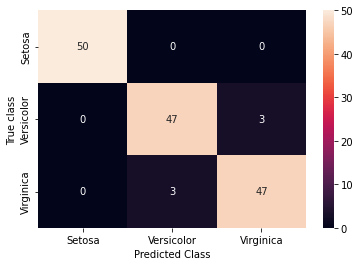

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the training set
features = [0,1,2,3]
X = iris.iloc[:,features].values
y = pd.factorize(iris['Species'].values)[0]

# Train the model and predict the class for each training set
model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate the confusion matrix
confusion = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heat map
categories = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(confusion, annot = True, xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted Class")
plt.ylabel("True class")
plt.show()

### 2.3. Classification regions

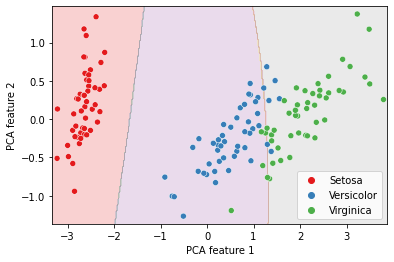

In [4]:
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA

# Plot the decision boundaries
# If the number of features is more than 2, reduce dimensionality to 2
if len(features) > 2:
    pca = sklearnPCA(n_components = 2)
    pca.fit(X)
    X_pca = pca.transform(X)
else: 
    X_pca = X
# Determine the limits of the space
xMin, xMax = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
yMin, yMax = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
# Generate the 2D mesh for the decision surface
resolution = 0.02
xx, yy = np.meshgrid(np.arange(xMin, xMax, resolution), np.arange(yMin, yMax, resolution))
meshPts = np.array([xx.ravel(), yy.ravel()]).T
# Transform the mesh points back to the original space
if len(features) > 2:
    meshPts = pca.inverse_transform(meshPts)
# Predict the classification for the mesh points
predictedMesh = model.predict(meshPts)
predictedMesh = predictedMesh.reshape(xx.shape)
# Set up the figure
fig, ax =  plt.subplots(1,1)
# Plot the regions and decision boundaries using the mesh
plt.contourf(xx, yy, predictedMesh, alpha = 0.2, cmap = 'Set1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# Plot each category
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = y, palette = 'Set1')
# Add axis labels 
if len(features) > 2:
    plt.xlabel("PCA feature 1")
    plt.ylabel("PCA feature 2")
else:
    plt.xlabel(iris.columns[features[0]])
    plt.ylabel(iris.columns[features[1]])
# Customize legend labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, categories)
plt.show()

## 3. Overfitting and underfitting
* Look at the learning curves
    * Bias (underfitting) if the training and validation accuracy are low
    * High variance (overfitting) if the validation accuracy is much lower than the training accuracy

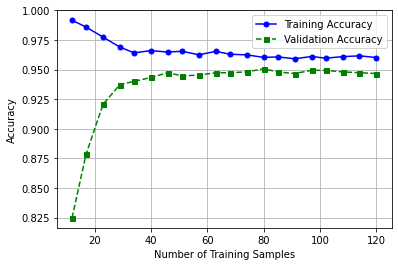

In [5]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit

# Generate the training set
features = [0,1,2,3]
X = iris.iloc[:,features].values
y = pd.factorize(iris['Species'].values)[0]

# Create the model
model = GaussianNB()

# Test different training sizes
train_sizes = np.linspace(0.1, 1.0, 20)

# Create the cross validation objects
# Specify a large number of splits to average different trials and obtain a smoother curve
cv = StratifiedShuffleSplit(n_splits=50, test_size = 0.2, random_state=1)

# Generate the learning curves averages
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes = train_sizes, cv = cv)
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

# Plot the learning curves
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.plot(train_sizes, test_mean, color = 'green', marker = 's', linestyle = '--', markersize = 5, label = 'Validation Accuracy')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 4. Cross validation
### 4.1. Accuracy

In [6]:
from sklearn.model_selection import cross_val_score

# Generate the training set
features = [0,1,2,3]
X = iris.iloc[:,features].values
y = pd.factorize(iris['Species'].values)[0]

# Create the model
model = GaussianNB()

# Stratified cross validation is used, cv specifies the number of folds
cross_val_score(model, X, y, cv = 5, scoring = "accuracy")

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### 4.2. Confusion matrix

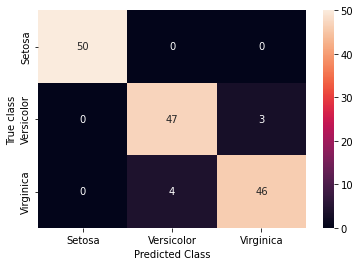

In [7]:
# First predict the classification for each sample using cross validation
from sklearn.model_selection import cross_val_predict

# Stratified cross validation is used, cv specifies the number of folds
y_pred = cross_val_predict(model, X, y, cv = 5)

# Compare the expected class and the predicted class
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heat map
sns.heatmap(conf, annot = True, xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted Class")
plt.ylabel("True class")
plt.show()

### 4.3. Precision, recall, and F1 score

In [8]:
# Calculate the prediction, recall, and f1 score using expected class and predicted class
from sklearn.metrics import precision_score, recall_score, f1_score

# This is not a binary classification, so we need to decide how to calculate TP, FP, TN, and FN
# micro: Calculate metrics globally by counting the total true positives, false negatives and false positives
# macro: Calculate metrics for each label, and find their unweighted mean which does not take label imbalance into account
combine_criterion = "macro"
precision = precision_score(y, y_pred, average = combine_criterion)
recall = recall_score(y, y_pred, average = combine_criterion)
f1 = f1_score(y, y_pred, average = combine_criterion)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9534480458850206
Recall: 0.9533333333333333
F1 Score: 0.9533286661999533


### 4.4. Visualization

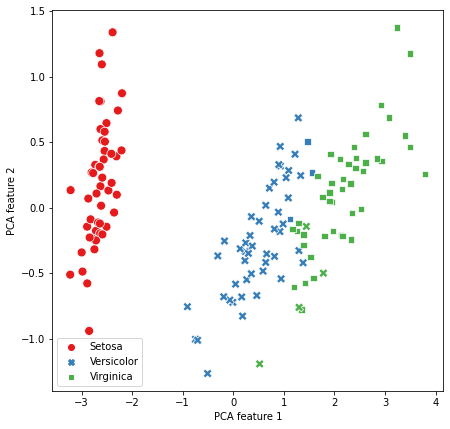

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (7,7))
# If the number of features is more than 2, use the PCA components for plotting
if len(features) > 2:
    xAxis = X_pca[:,0]
    yAxis = X_pca[:,1]
else:
    xAxis = X[:,features[0]]
    yAxis = X[:,features[1]]
# Scatter plot of the data
# Points color is the true class
# Points marker is the predicted class
sns.scatterplot(x = xAxis, y = yAxis, hue = y, style = y_pred, s = 80, palette = 'Set1')
# Add axis labels 
if len(features) > 2:
    plt.xlabel("PCA feature 1")
    plt.ylabel("PCA feature 2")
else:
    plt.xlabel(iris.columns[features[0]])
    plt.ylabel(iris.columns[features[1]])
# Customize legend labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, categories)
plt.show()